# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV


/tmp/ipykernel_911/3444166447.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("diabetes.csv")

X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)


/home/executor/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [4]:
y_pred_ada = ada_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


AdaBoost Accuracy: 0.943089430894309
Gradient Boosting Accuracy: 0.9442508710801394
XGBoost Accuracy: 0.943089430894309


In [5]:
param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


/home/executor/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/executor/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/executor/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/executor/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100]})

In [6]:
xgb_model_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model_reg.fit(X_train, y_train)

model_l1_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.1, random_state=42)
model_l1_reg.fit(X_train, y_train)

model_l2_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1, random_state=42)
model_l2_reg.fit(X_train, y_train)

y_pred_no_reg = xgb_model_reg.predict(X_test)
y_pred_l1_reg = model_l1_reg.predict(X_test)
y_pred_l2_reg = model_l2_reg.predict(X_test)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc

metrics_no_reg = evaluate_model(y_test, y_pred_no_reg)
metrics_l1_reg = evaluate_model(y_test, y_pred_l1_reg)
metrics_l2_reg = evaluate_model(y_test, y_pred_l2_reg)

print("Model without regularization:", metrics_no_reg)
print("Model with L1 regularization:", metrics_l1_reg)
print("Model with L2 regularization:", metrics_l2_reg)


Model without regularization: (0.943089430894309, 0.9433962264150944, 0.8438818565400844, 0.89086859688196, 0.9123255436546575)
Model with L1 regularization: (0.9419279907084785, 0.943127962085308, 0.8396624472573839, 0.8883928571428571, 0.9102158390133074)
Model with L2 regularization: (0.943089430894309, 0.9433962264150944, 0.8438818565400844, 0.89086859688196, 0.9123255436546575)


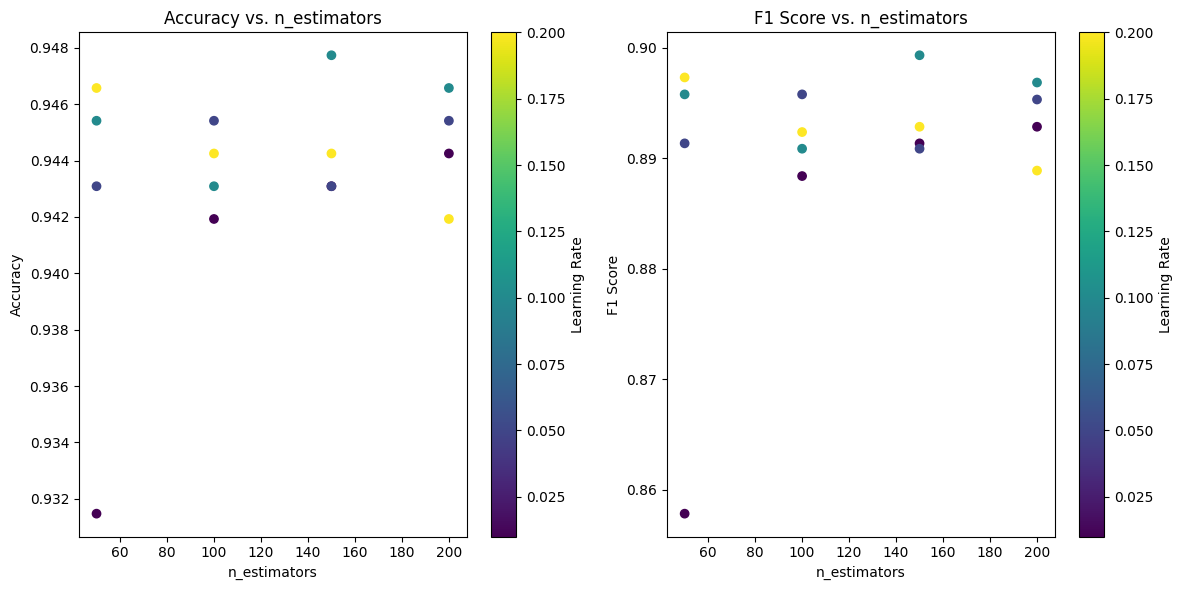

In [10]:
def test_hyperparameters(n_estimators_list, learning_rate_list):
    results = {'n_estimators': [], 'learning_rate': [], 'accuracy': [], 'f1': []}
    
    for n in n_estimators_list:
        for lr in learning_rate_list:
            model = XGBClassifier(n_estimators=n, learning_rate=lr, max_depth=3, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            accuracy, _, _, f1, _ = evaluate_model(y_test, y_pred)
            
            results['n_estimators'].append(n)
            results['learning_rate'].append(lr)
            results['accuracy'].append(accuracy)
            results['f1'].append(f1)
    
    return results

n_estimators_list = [50, 100, 150, 200]
learning_rate_list = [0.01, 0.05, 0.1, 0.2]

results = test_hyperparameters(n_estimators_list, learning_rate_list)

n_estimators_array = np.array(results['n_estimators'])
learning_rate_array = np.array(results['learning_rate'])
accuracy_array = np.array(results['accuracy'])
f1_array = np.array(results['f1'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(n_estimators_array, accuracy_array, c=learning_rate_array, cmap='viridis', label='Accuracy')
plt.colorbar(label='Learning Rate')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.scatter(n_estimators_array, f1_array, c=learning_rate_array, cmap='viridis', label='F1 Score')
plt.colorbar(label='Learning Rate')
plt.title('F1 Score vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


Conclusion: The model without regularization and the model with L2 regularization showed the same results in all metrics. These models achieve an accuracy of 94.3% and have the best F1-measure (0.8909) and ROC-AUC (0.9123).
The model with L1 regularization showed slightly worse results. Its accuracy is 94.19%, and the F1 and ROC-AUC indicators also decreased slightly.